## Predator Prey Dynamics
A simulation of the predator-prey population dynamic between lynxes and hares. In this model, we use classes to describe the different features of the predator and prey. We take into account various factors: reproduction rates, starvation rate, energy levels, their position relative to each other and hunting sucess rates. At the very end, a graph is created to summarise the results

In [15]:
import random
import matplotlib.pyplot as plt

## Creating the Model
Here we uses classes to model the prey, predator and the area in which they live.

In [ ]:
class Animal:
    def __init__(self, species, reproduction_rate=0.0, coordinates=(0,0)):
        self.species = species
        self.reproduction_rate = reproduction_rate
        self.coordinates = coordinates

    def get_coordinates(self):
        return self.coordinates
    
    def set_coordinates(self, new_coordinates):
        self.coordinates = new_coordinates
    
    def get_species(self):
        return self.species
    
    def get_reproduction_rate(self):
        return self.reproduction_rate
    
    def get_info(self):
        return {
            'species': self.species,
            'reproduction_rate': self.reproduction_rate,
            'coordinates': self.coordinates
        }
    
class Hares(Animal):
    def __init__(self,coordinates):
        super().__init__('Hares', reproduction_rate=0.3)    
        self.coordinates = coordinates
        

class Lynxes(Animal):
    def __init__(self,coordinates):
        super().__init__('Lynxes', reproduction_rate=0.2)
        self.energylevel = 10 # Initial energy level
        self.starv_rate = 2 # Energy lost per time step
        self.energy_gain = 8 # Energy gained per hare eaten
        self.hunt_success_rate = 0.3
        self.coordinates = coordinates
        self.Hunted = False    
    
    def get_energylevel(self):
        return self.energylevel
    
    def get_starv_rate(self):
        return self.starv_rate
    def get_energy_gain(self):
        return self.energy_gain
    def get_hunt_success_rate(self):
        return self.hunt_success_rate
    
    def get_info(self):
        return {
            'species': self.species,
            'reproduction_rate': self.reproduction_rate,
            'coordinates': self.coordinates,
            'energylevel': self.energylevel,
            'starv_rate': self.starv_rate,
            'energy_gain': self.energy_gain,
            'hunt_success_rate': self.hunt_success_rate}
    
    def hunt(self):
        if random.random() < self.hunt_success_rate:
            self.energylevel += self.energy_gain
            return True
        else:
            return False
        
    def starve(self):
        self.energylevel -= self.starv_rate
        if self.energylevel <= 0:
            return True # Lynx dies
        else:
            return False

class Area:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = [[None for _ in range(width)] for _ in range(height)]   
        self.Lynxes = []
        self.Hares = []

    def place_animal(self, animal):
        x = animal.get_coordinates()[0]
        y = animal.get_coordinates()[1]
        if 0 <= x < self.width and 0 <= y < self.height:
            self.grid[y][x] = animal
            animal.set_coordinates((x, y))
            if isinstance(animal, Lynxes):
                self.Lynxes.append(animal)
            elif isinstance(animal, Hares):
                self.Hares.append(animal)
        else:
            raise ValueError("Coordinates out of bounds")
    
    def remove_animal(self, animal):
        x = animal.get_coordinates()[0]
        y = animal.get_coordinates()[1]
        if 0 <= x < self.width and 0 <= y < self.height:
            self.grid[y][x] = None
            if isinstance(animal, Lynxes):
                self.Lynxes.remove(animal)
            elif isinstance(animal, Hares):
                self.Hares.remove(animal)
        else:
            raise ValueError("Coordinates out of bounds")
    
    
    def runStep(self):
        for lynx in self.Lynxes[:]:
            GetRandomLynx = self.Lynxes[random.randint(0,len(self.Lynxes)-1)]
            if not GetRandomLynx.Hunted:
                x, y = GetRandomLynx.get_coordinates()
                # Check adjacent cells for hares
                adjacent_cells = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
                if any(0 <= cx < self.width and 0 <= cy < self.height and isinstance(self.grid[cy][cx], Hares) for cx, cy in adjacent_cells):
                    if GetRandomLynx.hunt():
                        # Find the hare in adjacent cells and remove it
                        for cx, cy in adjacent_cells:
                            if 0 <= cx < self.width and 0 <= cy < self.height and isinstance(self.grid[cy][cx], Hares):
                                hare = self.grid[cy][cx]
                                self.remove_animal(hare)
                                break
                        GetRandomLynx.Hunted = True

                if GetRandomLynx.starve():
                    self.remove_animal(GetRandomLynx)
                    
        for lynx in self.Lynxes[:]:
            lynx.Hunted = False

        for hare in self.Hares[:]:
            if random.random() < hare.get_reproduction_rate():
                x, y = hare.get_coordinates()
                # Find an empty adjacent cell to place the new hare
                adjacent_cells = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
                random.shuffle(adjacent_cells)  # Randomize the order of checking
                for cx, cy in adjacent_cells:
                    if 0 <= cx < self.width and 0 <= cy < self.height and self.grid[cy][cx] is None:
                        new_hare = Hares((cx, cy))
                        self.place_animal(new_hare)
                        break

        for lynx in self.Lynxes[:]:
            if random.random() < lynx.get_reproduction_rate():
                x, y = lynx.get_coordinates()
                # Find an empty adjacent cell to place the new lynx
                adjacent_cells = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
                random.shuffle(adjacent_cells)  # Randomize the order of checking
                for cx, cy in adjacent_cells:
                    if 0 <= cx < self.width and 0 <= cy < self.height and self.grid[cy][cx] is None:
                        new_lynx = Lynxes((cx, cy))
                        self.place_animal(new_lynx)
                        break

        
    def display(self):
        for row in self.grid:
            print(' '.join([animal.species[0] if animal else '.' for animal in row]))

    
    def get_animal(self, x, y):
        if 0 <= x < self.width and 0 <= y < self.height:
            return self.grid[y][x]
        else:
            raise ValueError("Coordinates out of bounds")
        

# Running the Simulation
In this section, we run the simulation over 50 time steps, with randomized populations for both predator and prey.

In [17]:
MyEco = Area(10, 10)

# Randomly initialize populations, ensuring total does not exceed 100
haresPop = random.randint(1, 75)
maxLynx = 100 - haresPop
lynxesPop = random.randint(1, maxLynx)

for h in range(haresPop):
    x, y = random.randint(0, 9), random.randint(0, 9)
    while MyEco.grid[y][x] is not None:
        x, y = random.randint(0, 9), random.randint(0, 9)
    MyEco.place_animal(Hares((x,y)))
for l in range(lynxesPop):
    x, y = random.randint(0, 9), random.randint(0, 9)
    while MyEco.grid[y][x] is not None:
        x, y = random.randint(0, 9), random.randint(0, 9)
    MyEco.place_animal(Lynxes((x,y)))

MyEco.display()
PopulationData = []

print("Hares:", haresPop, "Lynxes:", lynxesPop)
print()
for step in range(50):
    print("Step", step+1)
    MyEco.runStep()
    MyEco.display()
    print("Hares:", len(MyEco.Hares), "Lynxes:", len(MyEco.Lynxes))
    print()
    PopulationData.append((len(MyEco.Hares), len(MyEco.Lynxes)))


H H H H L H . L H H
H H H L . H H . . .
. . L H . H H . H .
H . . . . L L . H L
L . H H . . H L . H
H . H L L . H H H .
H L L H . H H . . .
L L L . H . . H H .
. H H H . . L H H H
H H H . H . H H H .
Hares: 47 Lynxes: 17

Step 1
H H H L L H H L . H
H H H L . H H . . .
. . L H . H H . H .
H . L . . L L . H L
L . H H H . L L . H
H H H L L H H H H H
H L L H H H H . . .
L L L H H . . H H .
H H H H . . L H H H
H H H H H . H H H .
Hares: 53 Lynxes: 20

Step 2
H H H L L H H L . H
H H H L . H H L . .
H . L H . H H . H .
. . L . . L L . H L
L H H H H . L L . H
H H H L L H H H H H
H L L H H H H H H .
L L L H H . H H H .
H H H H . . L H H H
H H H H H . H H H .
Hares: 57 Lynxes: 21

Step 3
H H H L L H H L H H
H H H L . H H L . .
H H L . . H H . H L
. . L . H L L . H L
L . . H H L L L H H
H H L L L H H H H H
H L L H H H H H H H
L L L H H H H H H H
H H H H H . L H H H
H H H H H H H H H H
Hares: 63 Lynxes: 24

Step 4
H H H L L H H L H H
H H H L . H H L . .
H H L . H H L . H L
H H L . H L L H H L
L . 

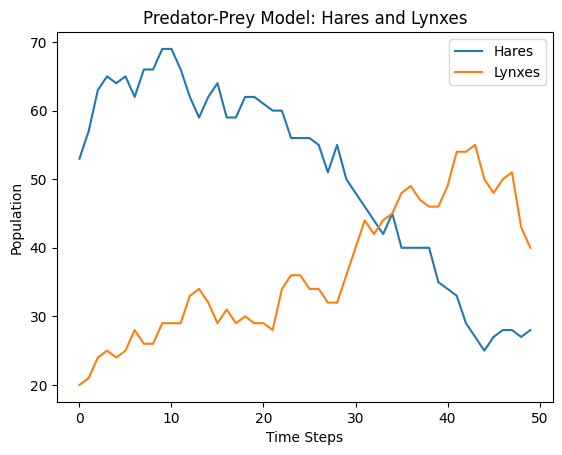

In [18]:
HareCounts, LynxCounts = zip(*PopulationData)
plt.plot(HareCounts, label='Hares')
plt.plot(LynxCounts, label='Lynxes')
plt.xlabel('Time Steps')
plt.ylabel('Population')
plt.title('Predator-Prey Model: Hares and Lynxes')
plt.legend()
plt.show()